In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Setup for better visuals
pd.set_option('display.max_columns', None)

# Update the path to your downloaded file
file_path = r"C:\Users\kanmani\Desktop\AutoStack360\Data\Cleaned\log_transformed_survey_data.csv"
df = pd.read_csv(file_path)

# Quick check
print("✅ Data loaded successfully!")
print(df.shape)
df.head()

✅ Data loaded successfully!
(20264, 84)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,LogSalary
0,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,3,1,Data scientist or machine learning specialist,100 to 499 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Integrated developer commun...,Pakistan,PKR\tPakistani rupee,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,C#;Rust;Scala,NaN,MongoDB;MySQL;SQLite,BigQuery;Cassandra;Databricks SQL;Elasticsearc...,NaN,Microsoft Azure;VMware,Amazon Web Services (AWS);Databricks;Google Cloud,NaN,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,Django,NaN,Apache Kafka;Apache Spark;CUDA;Hadoop;Hugging ...,CUDA;mlflow;TensorFlow;Torch/PyTorch,CUDA;TensorFlow;Torch/PyTorch,Docker;Homebrew;Pip,Docker,Docker,IntelliJ IDEA;IPython;Jupyter Notebook/Jupyter...,NaN,NaN,MacOS;Windows,NaN,GitHub Discussions;Markdown File,NaN,NaN,Discord;Google Meet;Slack;Whatsapp;Zoom,NaN,NaN,ChatGPT;GitHub Copilot;Google Gemini;Visual St...,Meta AI,NaN,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,"Good, but not great at handling complex tasks",Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Committing and r...,NaN,No,Circulating misinformation or disinformation;M...,"AI tools lack context of codebase, internal a...",Yes,People manager,AI-powered search (free),Software Development,90.0,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,10.0,8.898775
1,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),15,6,Data scientist or machine learning specialist,20 to 99 employees,I have a great deal of influence,Ask developers I know/work with;Research compa...,Is ready-to-go but also customizable for growt...,APIs;Connected to an open source project,Turkey,EUR European Euro,JavaScript;Julia;Python;SQL;TypeScript,Go;JavaScript;Python;Rust;SQL;TypeScript,JavaScript;Python;SQL;TypeScript,DuckDB;PostgreSQL;SQLite,Clickho

In [2]:
#Numerical_Features
print(df[['YearsCodePro', 'LogSalary']].dtypes)

YearsCodePro     object
LogSalary       float64
dtype: object


  YearsCode  YearsCodePro
0         3           1.0
1        15           6.0
2        27          17.0
3         7           7.0
4        32          18.0
YearsCodePro    float64
LogSalary       float64
dtype: object


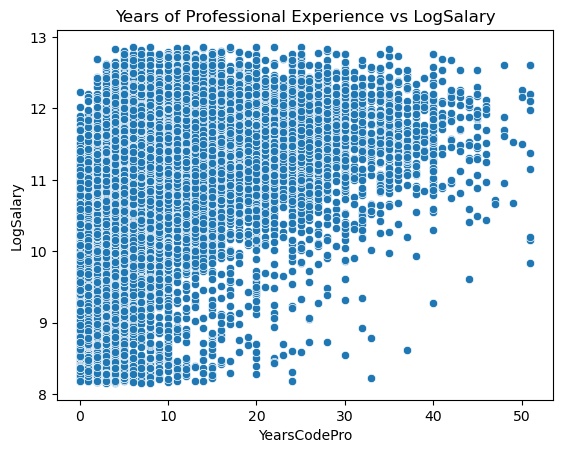

In [3]:
# Replace textual values
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
# Convert both to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
#checking
print(df[['YearsCode', 'YearsCodePro']].head())
print(df[['YearsCodePro', 'LogSalary']].dtypes) 
#scatterPlot
sns.scatterplot(x='YearsCodePro', y='LogSalary', data=df)
plt.title("Years of Professional Experience vs LogSalary")
plt.show()

C:\Users\kanmani\AppData\Local\Temp\ipykernel_17160\1547934962.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


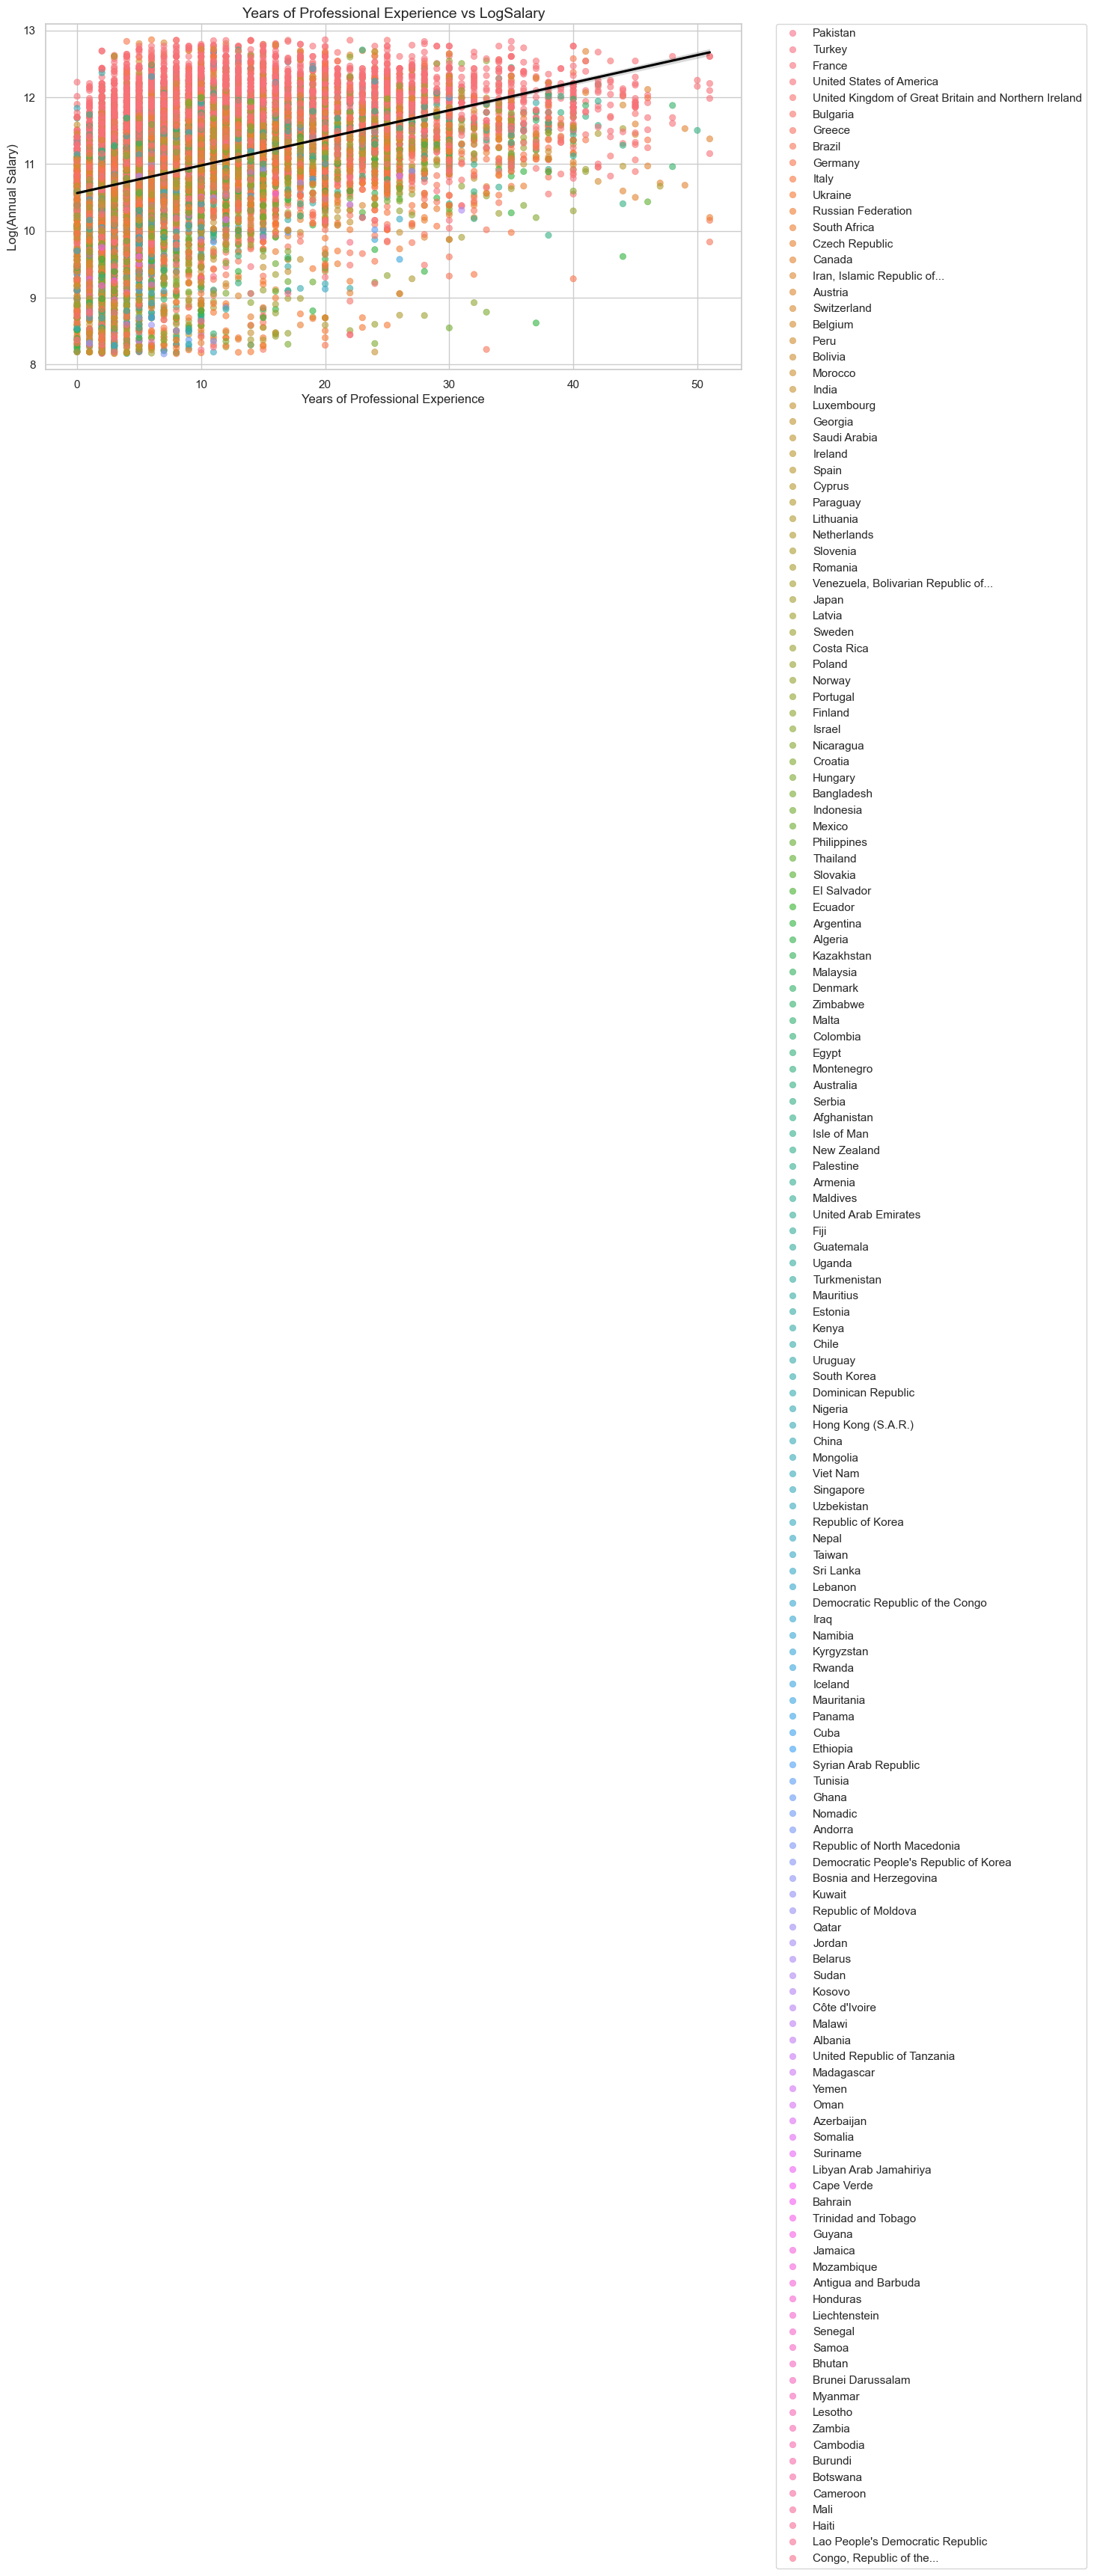

In [4]:
# Set a more appealing style
sns.set(style="whitegrid")

# Create the scatter plot with regression line and color by country
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearsCodePro', y='LogSalary', hue='Country', data=df, alpha=0.6, edgecolor=None)
# Add a regression line WITHOUT hue (since hue disables regplot)
sns.regplot(x='YearsCodePro', y='LogSalary', data=df, scatter=False, color='black', line_kws={'label':'Regression Line'})
# Add plot title and labels
plt.title("Years of Professional Experience vs LogSalary", fontsize=14)
plt.xlabel("Years of Professional Experience", fontsize=12)
plt.ylabel("Log(Annual Salary)", fontsize=12)

# Add legend for regression line and countries
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()

In [5]:
print("Number of unique countries:", df['Country'].nunique())


Number of unique countries: 157


Country
United States of America                                4092
Germany                                                 1800
United Kingdom of Great Britain and Northern Ireland    1261
Ukraine                                                 1000
India                                                    914
                                                        ... 
Sudan                                                      1
Democratic People's Republic of Korea                      1
Mongolia                                                   1
Democratic Republic of the Congo                           1
Congo, Republic of the...                                  1
Name: count, Length: 157, dtype: int64


C:\Users\kanmani\AppData\Local\Temp\ipykernel_17160\2646313812.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_countries.values, y=filtered_countries.index, palette='mako')


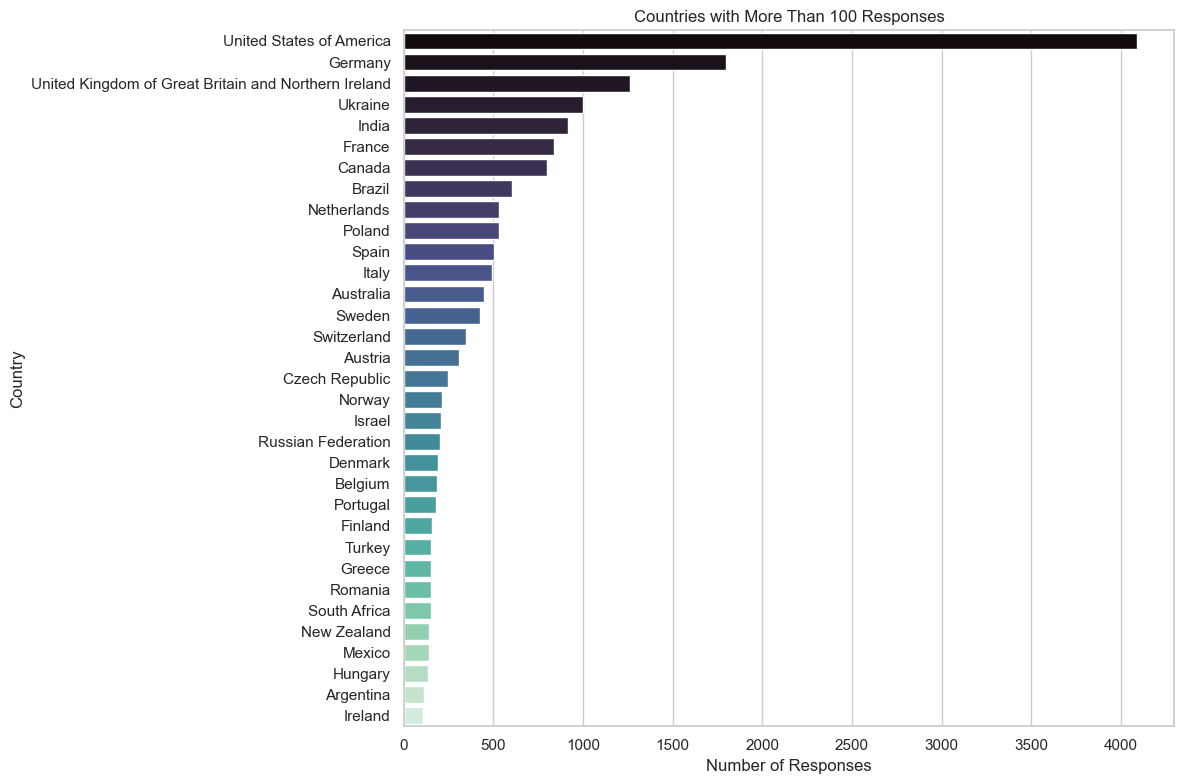

In [6]:
# Count of each country
country_counts = df['Country'].value_counts()

# Print the result
print(country_counts)

#plotting the country and it counts only above 100
# Step 2: Filter countries with more than 100 responses
filtered_countries = country_counts[country_counts > 100]

# Step 3: Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=filtered_countries.values, y=filtered_countries.index, palette='mako')
plt.title('Countries with More Than 100 Responses')
plt.xlabel('Number of Responses')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Country
United States of America            11.824350
Antigua and Barbuda                 11.744997
Switzerland                         11.585310
Andorra                             11.531703
Singapore                           11.506766
                                      ...    
Malawi                               8.856849
Lao People's Democratic Republic     8.594339
Bhutan                               8.368229
Burundi                              8.335911
Myanmar                              8.287780
Name: LogSalary, Length: 157, dtype: float64


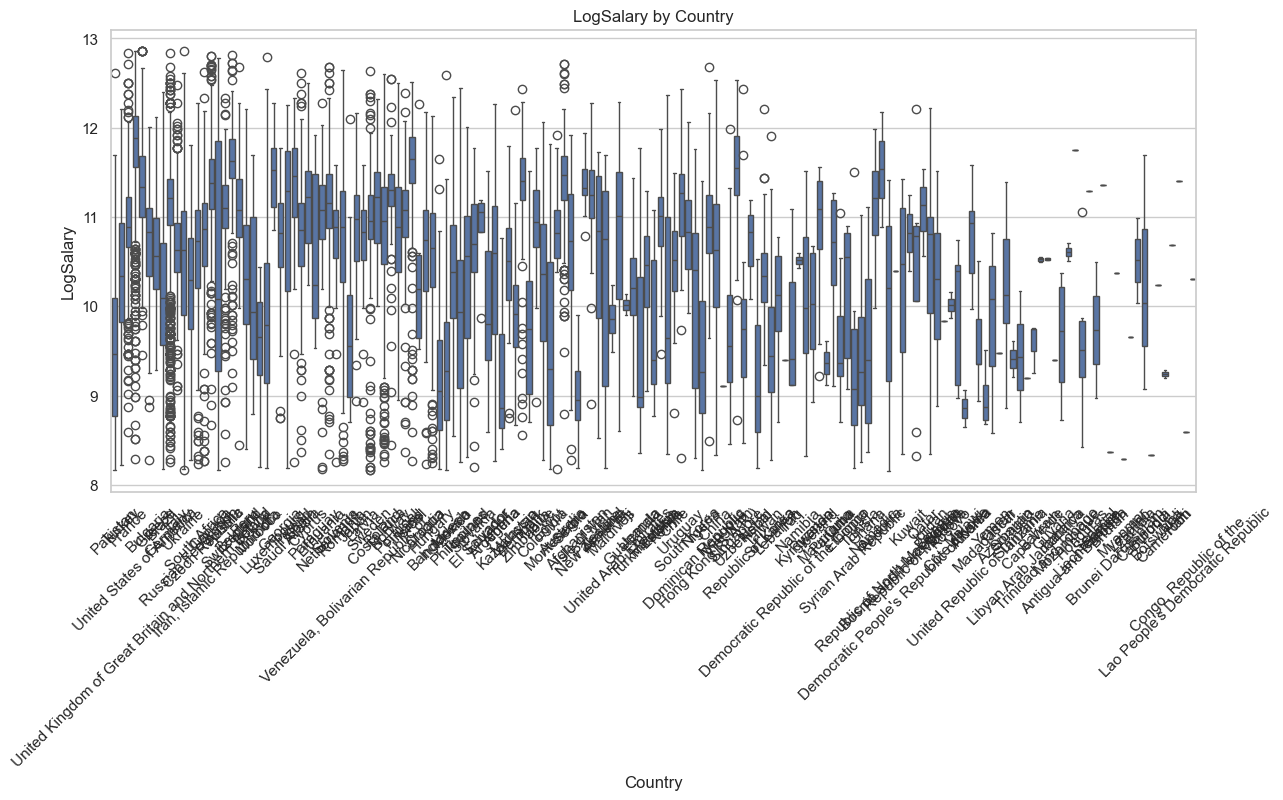

In [7]:
#Categorical vs. LogSalary: Use Boxplots + Group Means
# Group-wise average LogSalary
print(df.groupby('Country')['LogSalary'].mean().sort_values(ascending=False))

plt.figure(figsize=(14,6))
sns.boxplot(x='Country', y='LogSalary', data=df)
plt.xticks(rotation=45)
plt.title("LogSalary by Country")
plt.show()

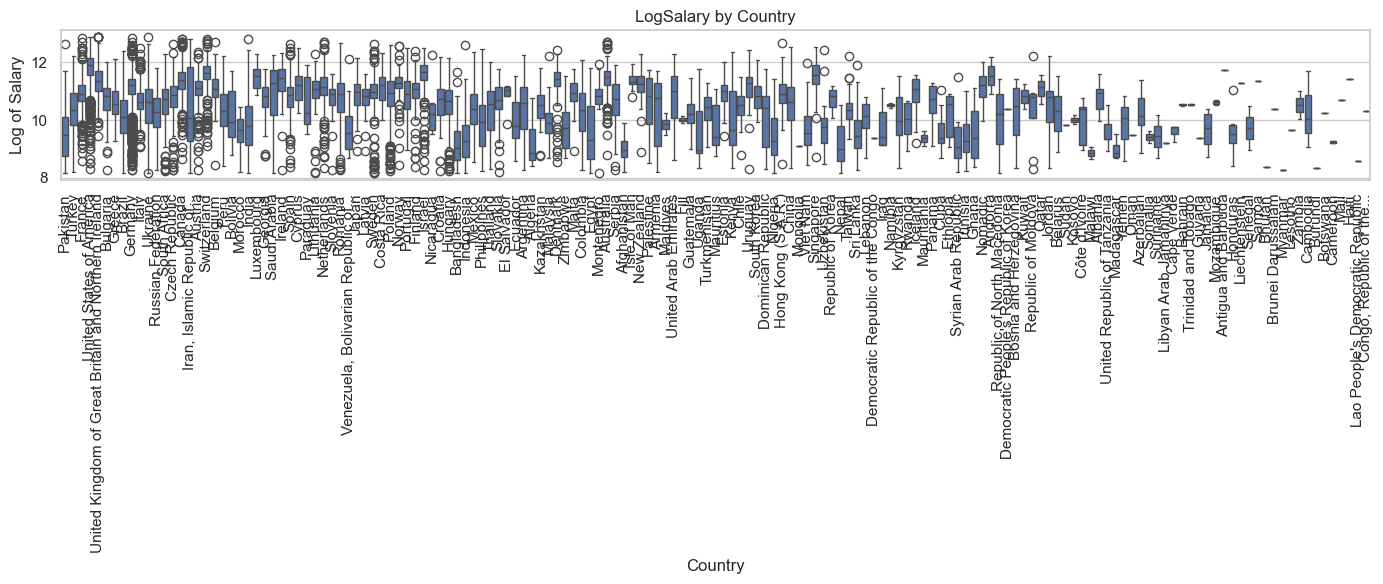

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Country', y='LogSalary', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("LogSalary by Country")
plt.xlabel("Country")
plt.ylabel("Log of Salary")
plt.tight_layout()       # Optional: Prevent label overlap
plt.show()

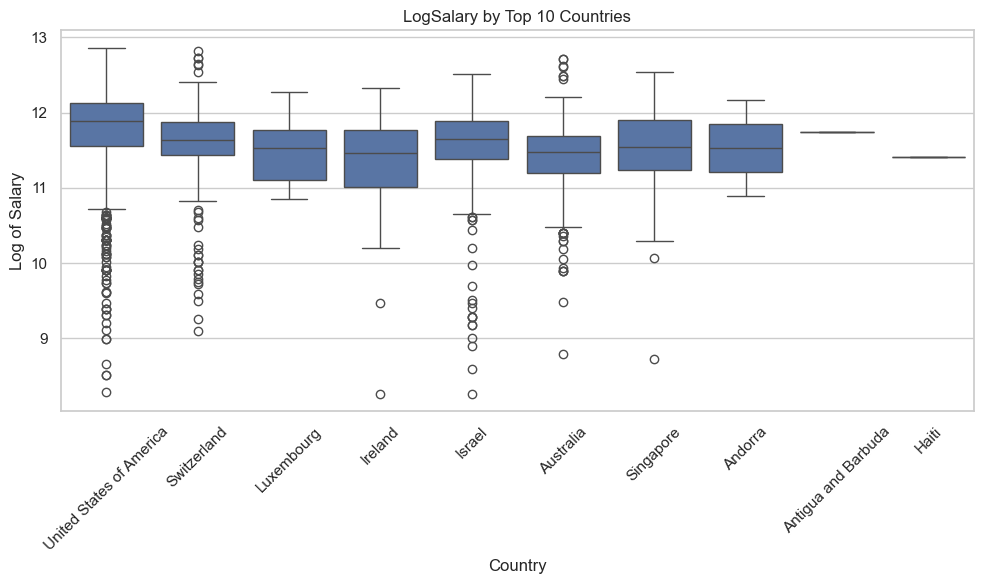

In [9]:
# Step 1: Get Top 10 Countries by Mean LogSalary
top_countries = df.groupby('Country')['LogSalary'].mean().sort_values(ascending=False).head(10).index

# Step 2: Filter DataFrame
top_df = df[df['Country'].isin(top_countries)]

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='LogSalary', data=top_df)
plt.xticks(rotation=45)
plt.title("LogSalary by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Log of Salary")
plt.tight_layout()
plt.show()


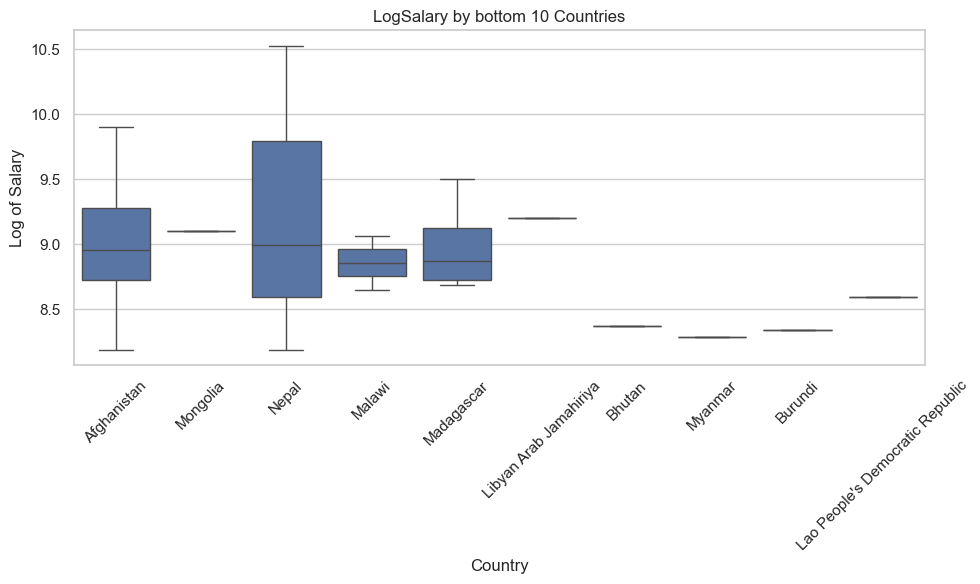

In [10]:
# Step 1: Get Top 10 Countries by Mean LogSalary
bottom_countries = df.groupby('Country')['LogSalary'].mean().sort_values(ascending=False).tail(10).index

# Step 2: Filter DataFrame
bottom_df = df[df['Country'].isin(bottom_countries)]

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='LogSalary', data=bottom_df)
plt.xticks(rotation=45)
plt.title("LogSalary by bottom 10 Countries")
plt.xlabel("Country")
plt.ylabel("Log of Salary")
plt.tight_layout()
plt.show()

C:\Users\kanmani\AppData\Local\Temp\ipykernel_17160\2974417365.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\kanmani\AppData\Local\Temp\ipykernel_17160\2974417365.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


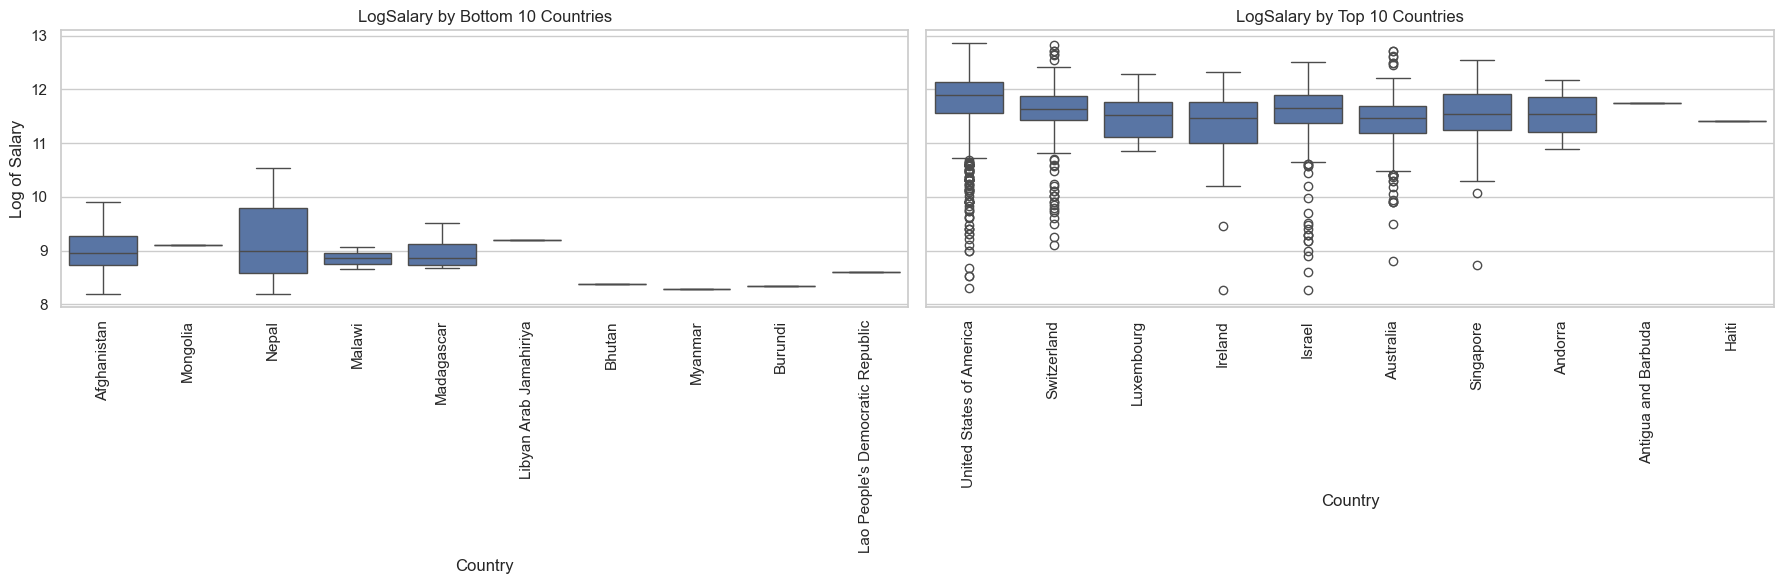

In [11]:

# Grouping
salary_means = df.groupby('Country')['LogSalary'].mean().sort_values()
bottom_countries = salary_means.head(10).index
top_countries = salary_means.tail(10).index

# Setup figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Bottom 10
sns.boxplot(x='Country', y='LogSalary', data=df[df['Country'].isin(bottom_countries)], ax=axes[0])
axes[0].set_title("LogSalary by Bottom 10 Countries")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Log of Salary")

# Top 10
sns.boxplot(x='Country', y='LogSalary', data=df[df['Country'].isin(top_countries)], ax=axes[1])
axes[1].set_title("LogSalary by Top 10 Countries")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel("Country")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

def leakage_free_target_encoding(df, categorical_col, target_col, n_splits=5, random_state=42):
    """
    Performs leakage-free target encoding using K-Fold cross-validation.
    
    Parameters:
        df: pandas DataFrame — input data
        categorical_col: str — name of the categorical column to encode
        target_col: str — name of the target variable
        n_splits: int — number of folds for K-Fold
        random_state: int — random seed for reproducibility
    
    Returns:
        df_copy: pandas DataFrame — new DataFrame with a leakage-free encoded column
    """
    df_copy = df.copy()
    encoded_col = f"{categorical_col}_Encoded"
    df_copy[encoded_col] = np.nan

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for train_idx, val_idx in kf.split(df_copy):
        train_df, val_df = df_copy.iloc[train_idx], df_copy.iloc[val_idx]

        # Compute target mean from training fold only
        target_mean = train_df.groupby(categorical_col)[target_col].mean()

        # Map mean to validation fold
        df_copy.loc[val_idx, encoded_col] = val_df[categorical_col].map(target_mean)

    # Fill missing values (for unseen categories) with global target mean
    global_mean = df[target_col].mean()
    df_copy[encoded_col] = df_copy[encoded_col].fillna(global_mean)

    return df_copy

# Apply the function to your DataFrame
df = leakage_free_target_encoding(df, categorical_col='Country', target_col='LogSalary')

# Drop original column if desired
df.drop(columns=['Country'], inplace=True)
output_path = r"C:\Users\kanmani\Desktop\AutoStack360\Data\Cleaned\df_with_country_encoded.csv"
df.to_csv(output_path, index=False)

print(f"Data saved successfully to: {output_path}")


Data saved successfully to: C:\Users\kanmani\Desktop\AutoStack360\Data\Cleaned\df_with_country_encoded.csv


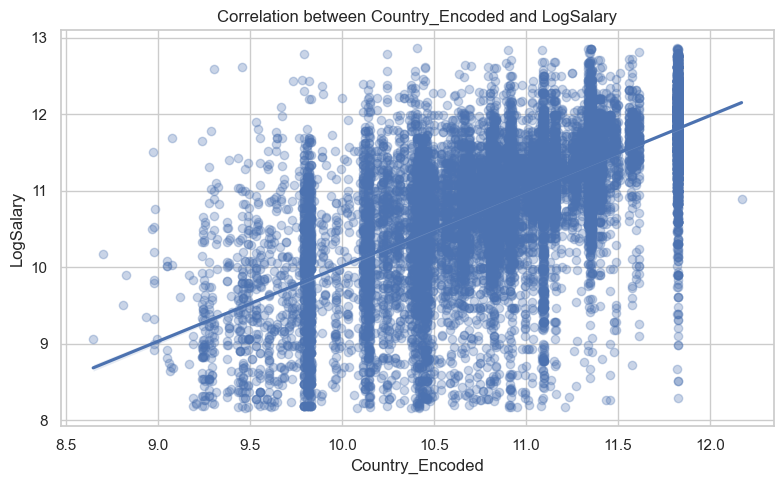

In [13]:
#Correlation btwn logSalary vs Encodedcountry
plt.figure(figsize=(8, 5))
sns.regplot(x='Country_Encoded', y='LogSalary', data=df, scatter_kws={'alpha':0.3})
plt.title("Correlation between Country_Encoded and LogSalary")
plt.xlabel("Country_Encoded")
plt.ylabel("LogSalary")
plt.tight_layout()
plt.show()